# Analiz

In [10]:
import pandas as pd

In [11]:
data = pd.read_csv("Housing.csv")

Veri kümesi 1338 satır ve 21 sütun içermektedir. Her satır, bir ev satışına ilişkin bilgileri içerir. Amacımız, diğer sütunlardaki değerleri kullanarak "price" sütunundaki değeri tahmin etmektir. Bu sayede, evin özelliklerine dayanarak yeni satışların fiyatlarını tahmin edebiliriz.

Veri kümesinde yer alan sütunlar şunlardır:

In [12]:
# Veri kümesi hakkında bilgi
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [13]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
# Eksik değerleri kontrol et
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


Verilere kontrol ettiğimizde boş değerimiz bulunmamaktadır. Bu yüzden eksik verileri tamamlama adımını atlıyoruz.

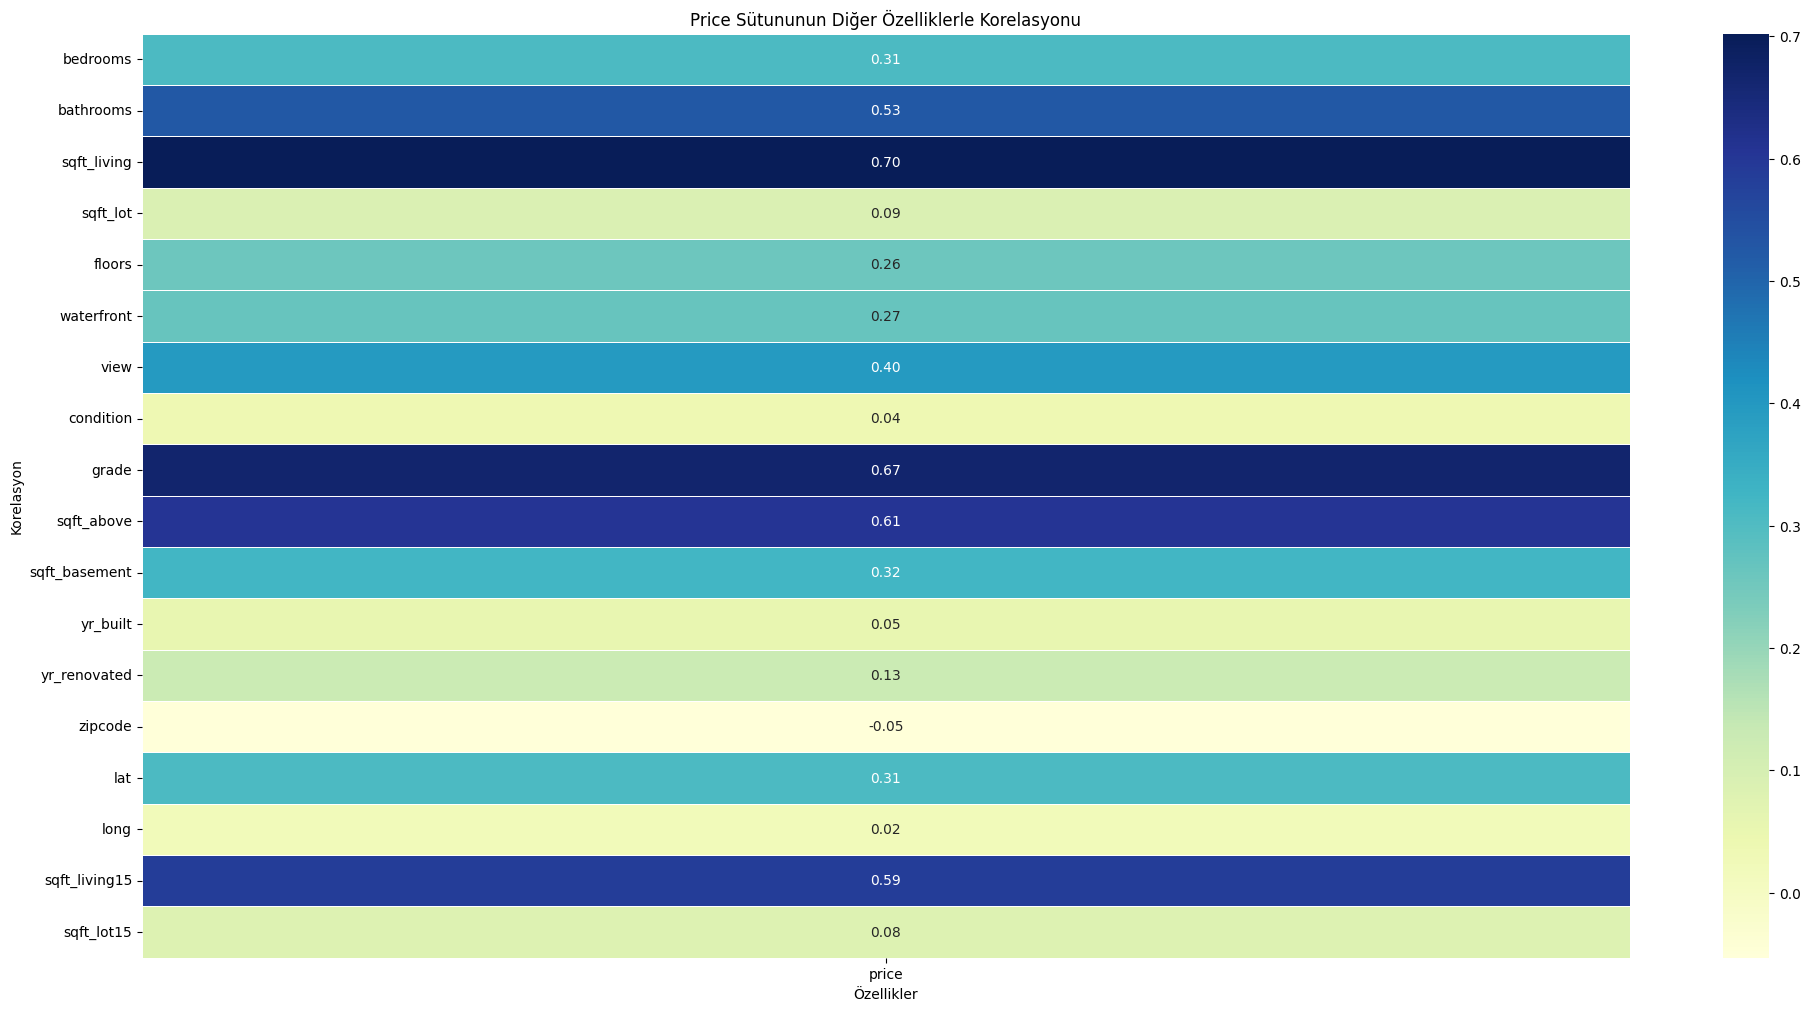

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini hesaplama
heat_data = data.drop(["date"], axis=1).corr()

# 'price' sütununun diğer sütunlarla olan korelasyonunu alma
price_corr = heat_data[['price']].drop(['id', 'price'])  # Sadece 'price' sütununu al ve 'price' sütununu çıkar

# Heatmap oluşturma
plt.figure(figsize=(24, 12))  # Grafik boyutunu ayarlama
sns.heatmap(price_corr, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)

# Grafik başlığı ve etiketler
plt.title('Price Sütununun Diğer Özelliklerle Korelasyonu')
plt.xlabel('Özellikler')
plt.ylabel('Korelasyon')
plt.show()


sqft_living: Yaşam alanı büyüklüğü metrekare cinsinden

grade: Genel not derecesi (1 ila 13)

sqft_above: Zemin seviyesinden yüksek yaşam alanı metrekare cinsinden

sqft_living15: En yakın 15 mülkün yaşam alanı büyüklüğü metrekare cinsinden

bathrooms: Banyo sayısı

Price (fiyat) değerinin diğer değerler ile arasında ki ilişkiye bakıyoruz. 

sqft_living, grade, sqft_above, sqft_living15, bathrooms sütunları ile arasında doğru orantı vardır.

# Ön İşleme

In [16]:
data = data.drop(["id"], axis=1)

In [17]:
# Tarih sütununu yıl ve ay olarak ayır
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data.drop('date', axis=1, inplace=True)

In [18]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


Tarih sütununu formatladıktan sonra yıl ve ay değerlerini ayrı sütun olarak ayırıyoruz.

# Model

In [19]:
# Özellikler (X) ve hedef değişkeni (y) tanımla
X = data.drop(['id', 'price'], axis=1)
y = data['price']

KeyError: "['id'] not found in axis"

Tahmin etmek istediğimiz değer price (fiyat) olduğu için data dan price sütunu çıkarıp X değişkenine atıyoruz.
Y değişkenine yani hedef değişkenimize price sütununun değerlerini atıyoruz.

In [ ]:
from sklearn.model_selection import train_test_split

# Eğitim ve test verisi olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Verilerimizi %80 eğitim ve %20 test olarak 2 ye ayırıyoruz. 

In [ ]:
from sklearn.linear_model import LinearRegression

# Linear Regression modeli eğit
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression modelimize verilerimizi vererek eğitim verilerimiz ile eğitiyoruz.

In [ ]:

y_lr_pred = lr_model.predict(X_test)

Test verilerimizi tahmin ediyoruz.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_mae = mean_absolute_error(y_test, y_lr_pred)
lr_mse = mean_squared_error(y_test, y_lr_pred)
lr_rmse = lr_mse ** 0.5
lr_r2 = r2_score(y_test, y_lr_pred)
print(f"Linear Regression MAE: {lr_mae}, MSE: {lr_mse}, RMSE: {lr_rmse}, R2: {lr_r2}")

Modelimizin hata oranını hesapladık. 

In [ ]:
import matplotlib.pyplot as plt

# Tahmin ve gerçek değerleri karşılaştırma grafiği
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_lr_pred, alpha=0.3)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('Linear Regression: Gerçek vs Tahmin')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()
min(y_test), max(y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor modeli eğit
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
# Test setinde tahmin yap
y_rf_pred = rf_model.predict(X_test)

# Değerlendirme metrikleri
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_rmse = rf_mse ** 0.5
rf_r2 = r2_score(y_test, y_rf_pred)
print(f"Random Forest MAE: {rf_mae}, MSE: {rf_mse}, RMSE: {rf_rmse}, R2: {rf_r2}")

In [ ]:
# Tahmin ve gerçek değerleri karşılaştırma grafiği
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_rf_pred, alpha=0.3)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.title('Random Forest: Gerçek vs Tahmin')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


In [ ]:
# !pip install lightgbm

In [ ]:
# import lightgbm as lgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Veriyi yükleyin ve bölün
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Modeli tanımlayın
# model = lgb.LGBMClassifier()

# # Modeli eğitin
# model.fit(X_train, y_train)

# # Tahmin yapın
# y_pred = model.predict(X_test)

# # Sonuçları değerlendirin
# print("Accuracy:", accuracy_score(y_test, y_pred))
